In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pickle_data = open(os.path.join(os.getcwd(), '..', 'data', 'processed', 'clean_data.pickle'), 'rb')
data = pickle.load(pickle_data)

In [3]:
cols = data.columns[1:]

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[cols])
data_scaled = pd.DataFrame(data_scaled, index=data.index, columns=cols)
data_scaled.head()

,income_index,education_index,white_alone,rent_index,value_index,employed
geoid,,,,,,
48021950100,-0.312700,-0.986568,0.652318,-1.491379,-0.661901,1.226548
48021950200,-0.481692,-1.522989,-0.570963,-1.398232,-0.902080,0.795565
48021950300,-0.167987,-0.926236,0.317202,-1.221345,-0.485497,0.881334
48021950400,-0.260314,-0.456254,0.021801,-1.026959,-0.623461,1.235095
48021950600,-0.495846,-1.162868,0.831765,-1.444631,-0.791303,0.843208


In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scikitplot.metrics import plot_silhouette

wcss = []
sil = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)
    sil.append(silhouette_score(data_scaled, kmeans.labels_))

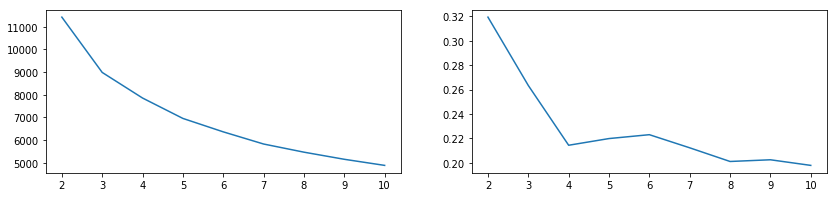

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(14, 3))

axes[0].plot(range(2, 11), wcss)
axes[1].plot(range(2, 11), sil)

In [20]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(data_scaled)
clust_pred = kmeans.predict(data_scaled)

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(data_scaled)
print(pca.explained_variance_ratio_.cumsum())
data_pca = pca.transform(data_scaled)
data_pca = pd.DataFrame(data_pca, index=data.index, columns=['x', 'y'])
data_pca.head()

[ 0.59930976  0.73357137]


,x,y
geoid,,
48021950100,-0.928743,-1.527293
48021950200,-1.881843,-1.354525
48021950300,-0.860028,-1.146543
48021950400,-0.676169,-1.475143
48021950600,-1.177143,-1.215259


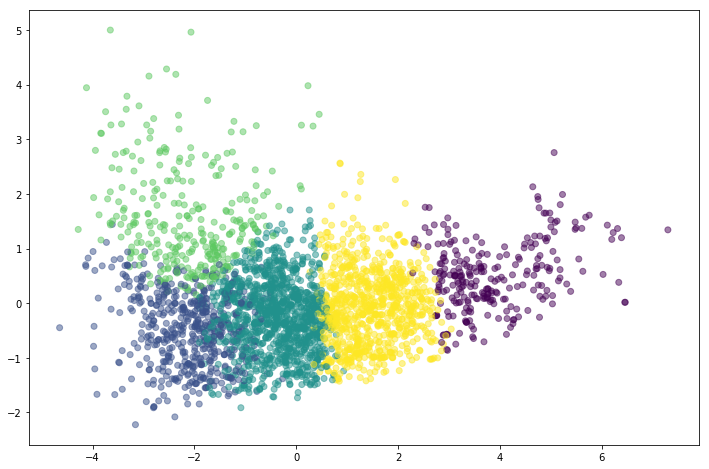

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.scatter(data_pca['x'], data_pca['y'], c=clust_pred, alpha=0.5)

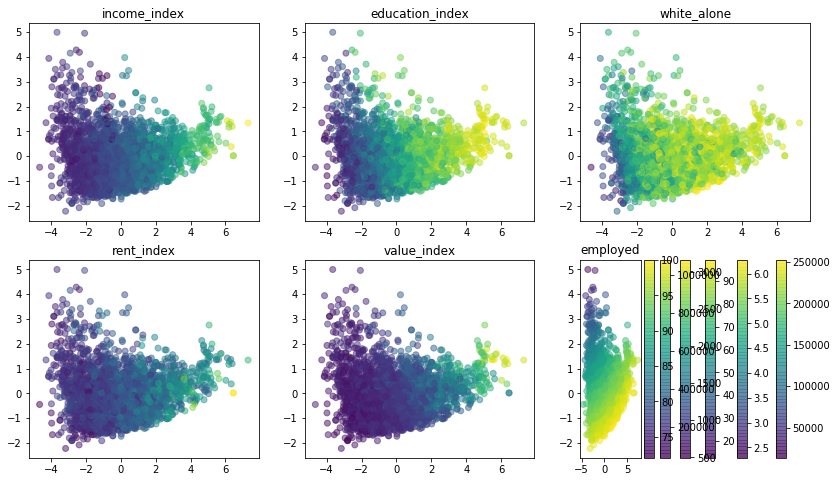

In [25]:
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
for col, ax in zip(data.columns[1:], axes.flatten()):
    cax = ax.scatter(data_pca['x'], data_pca['y'], c=data[col], alpha=0.5)
    fig.colorbar(cax)
    ax.set(title=col)

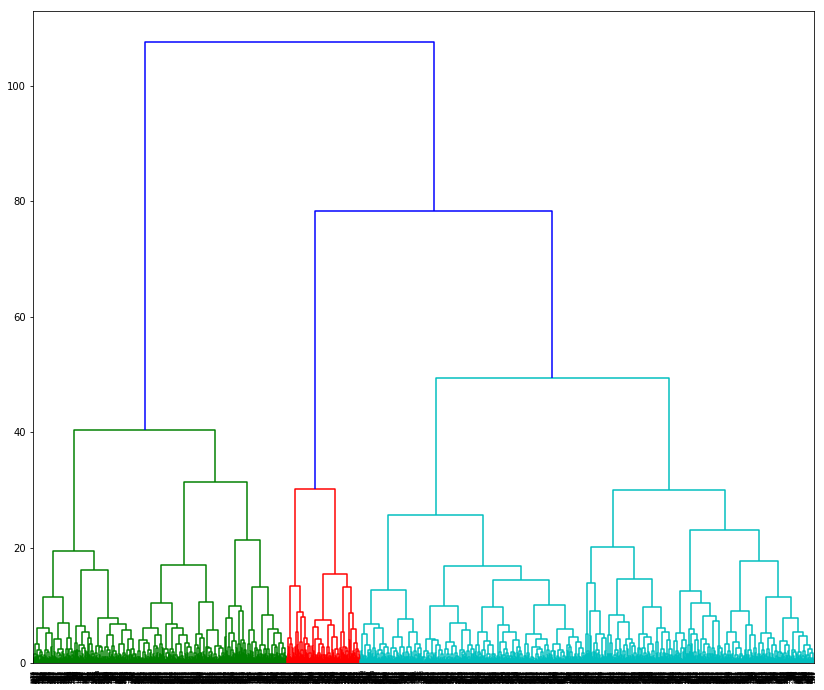

In [11]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(14, 12))

dend = dendrogram(linkage(data_scaled, method='ward'))

In [12]:
dend.keys()

dict_keys(['icoord', 'dcoord', 'ivl', 'leaves', 'color_list'])

In [13]:
dend['icoord']

[[15.0, 15.0, 25.0, 25.0],
 [5.0, 5.0, 20.0, 20.0],
 [65.0, 65.0, 75.0, 75.0],
 [55.0, 55.0, 70.0, 70.0],
 [45.0, 45.0, 62.5, 62.5],
 [35.0, 35.0, 53.75, 53.75],
 [12.5, 12.5, 44.375, 44.375],
 [95.0, 95.0, 105.0, 105.0],
 [125.0, 125.0, 135.0, 135.0],
 [115.0, 115.0, 130.0, 130.0],
 [100.0, 100.0, 122.5, 122.5],
 [85.0, 85.0, 111.25, 111.25],
 [28.4375, 28.4375, 98.125, 98.125],
 [145.0, 145.0, 155.0, 155.0],
 [165.0, 165.0, 175.0, 175.0],
 [185.0, 185.0, 195.0, 195.0],
 [205.0, 205.0, 215.0, 215.0],
 [190.0, 190.0, 210.0, 210.0],
 [170.0, 170.0, 200.0, 200.0],
 [150.0, 150.0, 185.0, 185.0],
 [265.0, 265.0, 275.0, 275.0],
 [255.0, 255.0, 270.0, 270.0],
 [245.0, 245.0, 262.5, 262.5],
 [235.0, 235.0, 253.75, 253.75],
 [225.0, 225.0, 244.375, 244.375],
 [285.0, 285.0, 295.0, 295.0],
 [305.0, 305.0, 315.0, 315.0],
 [290.0, 290.0, 310.0, 310.0],
 [234.6875, 234.6875, 300.0, 300.0],
 [325.0, 325.0, 335.0, 335.0],
 [355.0, 355.0, 365.0, 365.0],
 [345.0, 345.0, 360.0, 360.0],
 [375.0, 375.0, 

In [14]:
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
hc_clust = hc.fit_predict(data_scaled)

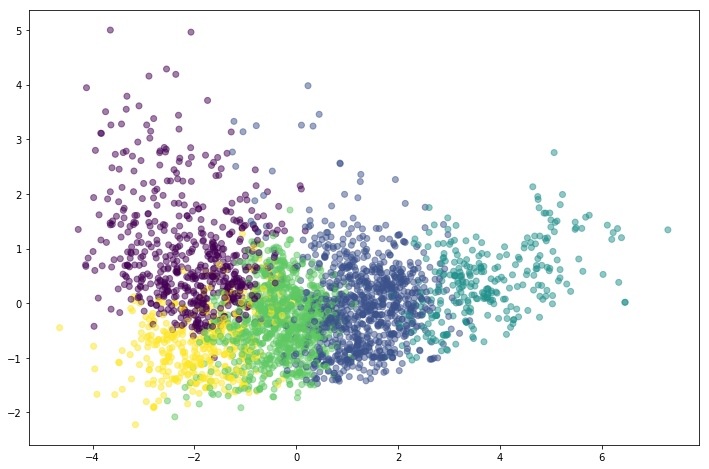

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.scatter(data_pca['x'], data_pca['y'], c=hc_clust, alpha=0.5)

In [16]:
data['cluster_km5'] = clust_pred

In [17]:
data.groupby('cluster_km5').mean()

,income_index,education_index,white_alone,rent_index,value_index,employed
cluster_km5,,,,,,
0,73933.124202,4.340940,0.796339,1092.177049,198232.843902,0.942513
1,161914.650024,5.744459,0.879365,1747.166076,572314.942049,0.960456
2,52986.065505,3.716537,0.691739,970.760879,160399.111725,0.861455
3,105588.376398,5.166078,0.855279,1373.923650,317014.836283,0.954554
4,54687.458144,3.464045,0.531672,981.794293,141872.515090,0.934650


In [18]:
changes = []
for index in data.index.unique():
    if len(data.loc[index]['cluster_km5'].unique()) > 3:
        changes.append(index)

In [19]:
data.loc[changes]

,year,income_index,education_index,white_alone,rent_index,value_index,employed,cluster_km5
geoid,,,,,,,,
48453000901,2000,57039.014218,2.797392,0.226895,937.353790,73646.666560,0.934366,4
48453000901,2009,64951.780682,4.104374,0.396426,1175.721333,278859.560161,0.794726,2
48453000901,2010,69509.907900,4.252191,0.500600,1228.758958,251661.366184,0.832228,2
48453000901,2011,70326.075853,4.087884,0.561828,1181.288796,265828.038017,0.831037,2
48453000901,2012,71063.896049,4.388235,0.687500,1248.114734,240522.125958,0.892797,0
48453000901,2013,55739.932862,4.061093,0.735621,1281.524273,190035.085536,0.864225,2
48453000901,2014,62586.759936,4.365190,0.773548,1318.288544,218992.891876,0.908040,0
48453000901,2015,67921.502088,4.580877,0.768129,1431.491825,249977.035694,0.909185,0
48453000901,2016,84047.746781,4.648258,0.777544,1628.719008,318029.595016,0.919157,3


In [20]:
kmeans = KMeans(n_clusters=6)
clust_pred = kmeans.fit_predict(data[data.columns[1:7]])
data['cluster_km6'] = clust_pred

In [21]:
changes = []
for index in data.index.unique():
    if len(data.loc[index]['cluster_km6'].unique()) > 3:
        changes.append(index)

In [22]:
for index in changes:
    display(data.loc[index])

,year,income_index,education_index,white_alone,rent_index,value_index,employed,cluster_km5,cluster_km6
geoid,,,,,,,,,
48453000801,2000,57474.638006,2.423260,0.306553,1012.959518,86772.283791,0.938290,4,0
48453000801,2009,52037.829481,3.199478,0.662214,699.159262,160952.467276,0.879479,2,0
48453000801,2010,48346.075665,2.807692,0.601056,782.461908,162859.534725,0.864865,2,0
48453000801,2011,49380.002968,2.990654,0.605452,761.263525,164186.598397,0.938619,4,5
48453000801,2012,47524.996843,3.072816,0.636364,849.633192,223929.148453,0.943894,4,5
48453000801,2013,51055.818469,3.340753,0.666667,760.147970,241401.260514,0.944324,4,3
48453000801,2014,46068.070721,3.195635,0.691622,886.979541,256258.163755,0.925214,4,3
48453000801,2015,48751.926656,3.248000,0.761905,855.810518,315067.311744,0.905916,2,3
48453000801,2016,55363.924051,3.303167,0.798060,880.054152,360448.529412,0.925017,0,4


,year,income_index,education_index,white_alone,rent_index,value_index,employed,cluster_km5,cluster_km6
geoid,,,,,,,,,
48453000803,2000,57199.055179,3.011968,0.222519,767.934298,70619.288801,0.942664,4,0
48453000803,2009,48849.669593,3.880216,0.482396,934.806332,207230.258118,0.954031,4,5
48453000803,2010,53275.036304,4.422007,0.527817,1006.994642,211616.344273,0.942091,4,5
48453000803,2011,54189.703482,4.645161,0.570917,1036.872370,243370.285985,0.957201,4,3
48453000803,2012,56147.841035,4.524455,0.591582,1081.471483,242523.568720,0.968214,0,3
48453000803,2013,64099.460137,4.698153,0.682239,1146.704341,245923.777631,0.967931,0,3
48453000803,2014,65156.449550,4.590618,0.648569,1262.850385,257014.081003,0.968095,0,3
48453000803,2015,76389.228729,4.789693,0.719674,1360.853749,326080.566739,0.962827,3,4
48453000803,2016,78244.422890,4.852653,0.777396,1345.881226,312406.679764,0.943056,3,3


,year,income_index,education_index,white_alone,rent_index,value_index,employed,cluster_km5,cluster_km6
geoid,,,,,,,,,
48453000901,2000,57039.014218,2.797392,0.226895,937.353790,73646.666560,0.934366,4,0
48453000901,2009,64951.780682,4.104374,0.396426,1175.721333,278859.560161,0.794726,2,3
48453000901,2010,69509.907900,4.252191,0.500600,1228.758958,251661.366184,0.832228,2,3
48453000901,2011,70326.075853,4.087884,0.561828,1181.288796,265828.038017,0.831037,2,3
48453000901,2012,71063.896049,4.388235,0.687500,1248.114734,240522.125958,0.892797,0,3
48453000901,2013,55739.932862,4.061093,0.735621,1281.524273,190035.085536,0.864225,2,5
48453000901,2014,62586.759936,4.365190,0.773548,1318.288544,218992.891876,0.908040,0,5
48453000901,2015,67921.502088,4.580877,0.768129,1431.491825,249977.035694,0.909185,0,3
48453000901,2016,84047.746781,4.648258,0.777544,1628.719008,318029.595016,0.919157,3,4


,year,income_index,education_index,white_alone,rent_index,value_index,employed,cluster_km5,cluster_km6
geoid,,,,,,,,,
48453001000,2000,38313.629014,2.500671,0.460227,630.293010,109775.955685,0.944997,4,0
48453001000,2009,54078.681413,3.255890,0.586775,941.168900,218970.498592,0.932894,4,5
48453001000,2010,52429.666877,3.347143,0.631095,909.284270,219348.576326,0.921053,4,5
48453001000,2011,53710.265769,3.612671,0.679819,893.266930,252245.845060,0.940059,4,3
48453001000,2012,48673.258628,3.565068,0.695275,841.055395,271995.564553,0.916954,4,3
48453001000,2013,51622.270053,3.585247,0.713517,913.908202,285538.211875,0.887981,2,3
48453001000,2014,63568.823350,3.717405,0.717374,1013.768210,295145.244871,0.898963,2,3
48453001000,2015,69588.388664,3.829599,0.729590,1024.747427,326689.134508,0.910857,0,4
48453001000,2016,76702.775897,3.891828,0.745214,1097.022059,335168.205805,0.924929,0,4


,year,income_index,education_index,white_alone,rent_index,value_index,employed,cluster_km5,cluster_km6
geoid,,,,,,,,,
48453002005,2000,57293.737271,4.104555,0.650600,951.240729,146945.504392,0.960701,4,0
48453002005,2009,50328.669074,4.210032,0.678108,998.963187,216967.004623,0.916928,0,5
48453002005,2010,51815.581709,4.283850,0.695376,963.087448,262037.501353,0.914927,0,3
48453002005,2011,48330.807666,4.228513,0.712959,992.112462,249524.927592,0.943880,0,3
48453002005,2012,50094.125657,4.264058,0.799832,1017.566903,242567.322484,0.939037,0,3
48453002005,2013,50896.321123,4.388440,0.860561,1027.952783,260296.864987,0.924064,0,3
48453002005,2014,56121.477649,4.686968,0.918345,1019.302650,264557.993134,0.966887,0,3
48453002005,2015,59767.267524,4.749765,0.896972,1009.641298,282766.984432,0.979112,0,3
48453002005,2016,73348.270113,4.548582,0.911259,1106.302170,334309.153713,0.979109,0,4


,year,income_index,education_index,white_alone,rent_index,value_index,employed,cluster_km5,cluster_km6
geoid,,,,,,,,,
48453002211,2000,63455.849474,2.856833,0.354589,872.844176,64957.299259,0.976802,4,0
48453002211,2009,50814.784659,2.906599,0.478364,964.231818,109942.794028,0.934765,4,0
48453002211,2010,69874.499647,3.179679,0.614127,660.505776,287585.370887,0.964187,4,3
48453002211,2011,56223.019495,3.445535,0.523024,702.197662,377038.838542,0.918919,4,4
48453002211,2012,58125.052834,3.406806,0.629449,689.581366,310749.962051,0.921831,4,3
48453002211,2013,63308.837501,3.655951,0.700446,746.676121,146839.386746,0.926270,4,0
48453002211,2014,63692.560641,3.384298,0.662809,955.266099,166851.342407,0.954931,4,5
48453002211,2015,63534.768932,3.463796,0.644904,1019.077746,179527.228965,0.977904,4,5
48453002211,2016,71130.410023,3.454237,0.601517,1136.635945,167919.818457,0.969871,4,5
